# AAPL Stock Price Prediction Using Different Machine Learning Models and Compare the Performance of the Models

# Bayesian Ridge Regression 

Bayesian regression allows a natural mechanism to survive insufficient data or poorly distributed data by formulating linear regression using probability distributors rather than point estimates.

# Import Libraries

In [50]:
# yahoo_finance is used to fetch data 
!pip install yfinance

In [51]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

# MATPLOTLIB & SEABORN FOR GRAPH-PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Data into the Data Frame

In [52]:
# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2023-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.888065,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.880943,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070831,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.538437,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.384151,82271200


# Data Preprocessing

In [53]:
dataset['Open_Close'] = (dataset['Open'] - dataset['Adj Close'])/dataset['Open']
dataset['High_Low'] = (dataset['High'] - dataset['Low'])/dataset['Low']
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Returns
Date,,,,,,,,,
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.880943,118071600,0.052201,0.015062,-0.000174
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070831,89738400,0.047854,0.008078,0.004645
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.538437,94640000,0.042010,0.013406,0.011385
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.384151,82271200,0.050550,0.009659,-0.003714
2018-01-09,43.637501,43.764999,43.352501,43.582500,41.379406,86336000,0.051747,0.009515,-0.000115


In [54]:
#View Dataset
dataset

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Returns
Date,,,,,,,,,
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.880943,118071600,0.052201,0.015062,-0.000174
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070831,89738400,0.047854,0.008078,0.004645
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.538437,94640000,0.042010,0.013406,0.011385
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.384151,82271200,0.050550,0.009659,-0.003714
2018-01-09,43.637501,43.764999,43.352501,43.582500,41.379406,86336000,0.051747,0.009515,-0.000115
...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900,-0.005645,0.021444,-0.002798
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800,0.011784,0.020898,-0.013878
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,0.029476,0.040995,-0.030685


# Dataset Cleaning and Null Value Testing

In [55]:
# See how many null values in each column

dataset.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Open_Close    0
High_Low      0
Returns       0
dtype: int64

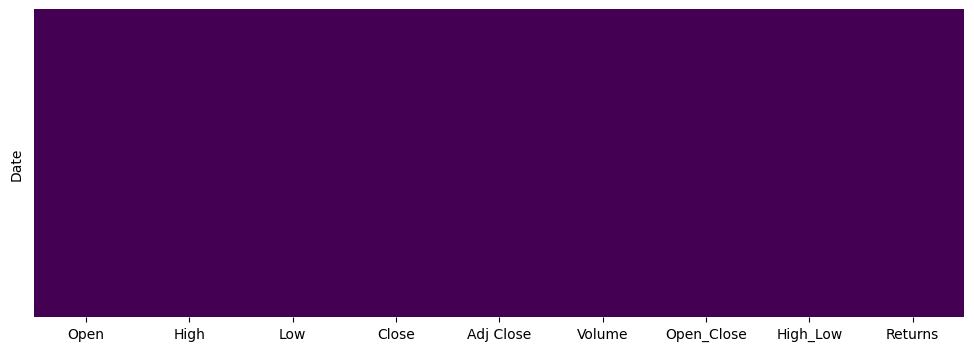

In [56]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")

# Analyze the Data

In [57]:
# see number of rows, number of columns
dataset.shape

(1258, 9)

In [58]:
#TOTAL NUMBER OF RECORDS
dataset.size
print("Total number of records = ",dataset.size)

Total number of records =  11322


In [59]:
# see columns names
dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Open_Close',
       'High_Low', 'Returns'],
      dtype='object')

In [60]:
#View Data Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-01-03 to 2022-12-30
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1258 non-null   float64
 1   High        1258 non-null   float64
 2   Low         1258 non-null   float64
 3   Close       1258 non-null   float64
 4   Adj Close   1258 non-null   float64
 5   Volume      1258 non-null   int64  
 6   Open_Close  1258 non-null   float64
 7   High_Low    1258 non-null   float64
 8   Returns     1258 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 98.3 KB


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Open_Close'}>,
        <AxesSubplot:title={'center':'High_Low'}>,
        <AxesSubplot:title={'center':'Returns'}>]], dtype=object)

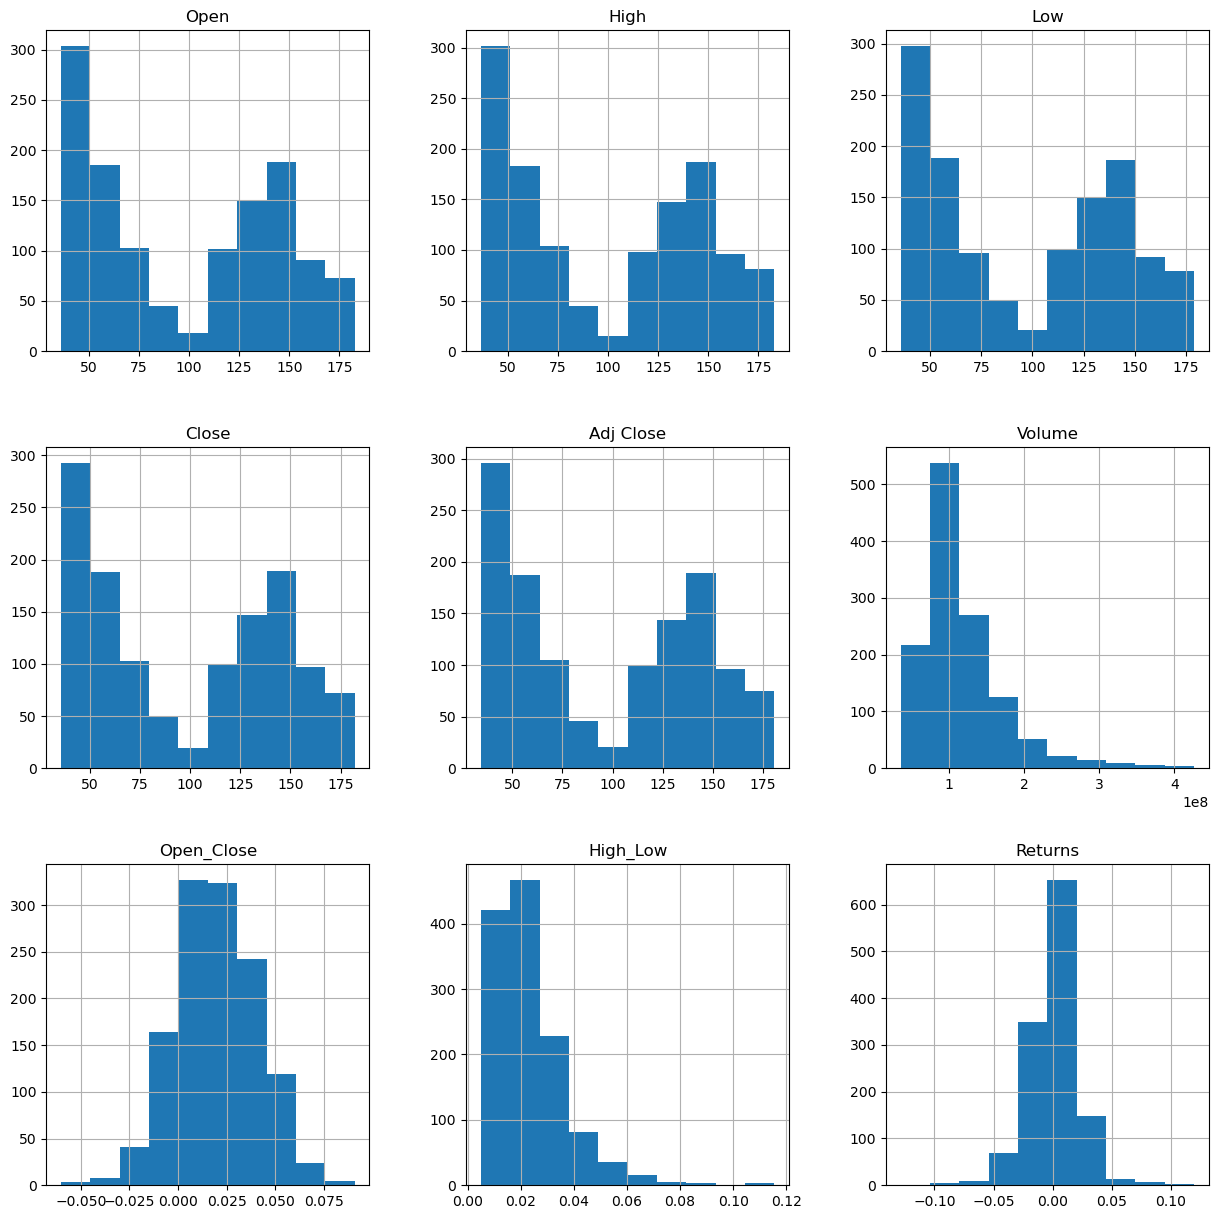

In [61]:
# Histogram per each numerical column

dataset.hist(figsize=(15, 15))

In [62]:
# The statistics per each column
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Returns
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000
mean,98.072611,99.262433,96.924873,98.136639,96.712368,1.168922e+08,0.019652,0.023376,0.001141
std,46.294417,46.886649,45.680389,46.302281,46.596406,5.506495e+07,0.020981,0.013311,0.021094
min,35.994999,36.430000,35.500000,35.547501,34.257271,3.519590e+07,-0.060166,0.004924,-0.128647
25%,51.003125,51.468124,50.586249,51.044375,49.446954,8.012802e+07,0.005515,0.014252,-0.009110
50%,91.621250,93.032501,90.943752,92.123749,90.572361,1.023249e+08,0.019222,0.019975,0.001049
75%,142.765003,144.487499,141.022495,142.882496,141.953880,1.372278e+08,0.034144,0.028733,0.012366
max,182.630005,182.940002,179.119995,182.009995,180.683868,4.265100e+08,0.090658,0.115520,0.119808


# Define X and Y

In [63]:
X = dataset[['Open', 'High', 'Low','Volume', 'Open_Close', 'High_Low', 'Returns']]
y = dataset['Adj Close']

In [64]:
from sklearn.linear_model import BayesianRidge, LinearRegression

# Fit the Bayesian Ridge Regression and an OLS for comparison
model = BayesianRidge(compute_score=True)
model.fit(X, y)

BayesianRidge(compute_score=True)

In [65]:
model.coef_

array([ 6.18134351e-02,  4.68863839e-01,  4.61348104e-01, -1.76277112e-09,
       -5.00011468e+01,  6.56466151e+00,  5.77951884e+00])

In [66]:
model.scores_

array([-6010.64756817, -1702.99665802, -1544.03274294, -1308.39458361,
       -1234.60867198, -1234.47010022, -1234.47008908, -1234.47008908,
       -1234.47008906])

# Split Train Data and Test Data

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Dataset Traning and Model Traning

In [69]:
model = BayesianRidge(compute_score=True)
model.fit(X_train, y_train)

BayesianRidge(compute_score=True)

In [70]:
model.coef_

array([ 4.28215606e-02,  4.64271169e-01,  4.85589935e-01, -2.44166374e-09,
       -4.78359795e+01,  9.23781001e+00,  6.69006710e+00])

In [71]:
model.scores_

array([-4809.36182212, -1372.03855886, -1249.11590265, -1081.89990316,
        -990.5601311 ,  -989.46511754,  -989.46494911,  -989.46494907,
        -989.46494892])

# Comparison of Actual Values and Predicted Values

In [72]:
y_pred = model.predict(X_test)
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(df.head())
print(df.tail())

                Actual   Predicted
Date                              
2018-01-10   41.369911   41.168797
2019-12-19   68.477776   68.746277
2018-03-20   41.765003   41.675689
2021-12-01  163.569504  165.316100
2018-09-28   54.197548   54.357418
                Actual   Predicted
Date                              
2022-05-20  136.962463  135.551602
2018-02-16   41.095284   40.894688
2019-08-19   51.286274   51.575091
2018-04-06   40.130051   39.437538
2020-12-18  124.966759  125.233670


# Accuracy and Loss Function Values of the Model

In [73]:
from sklearn import metrics
print('Mean_Absolute_Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean_Squared_Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root_Mean_Squared_Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean_Absolute_Error(MAE): 0.4930365845435712
Mean_Squared_Error(MSE): 0.41082514230330663
Root_Mean_Squared_Error(RMSE): 0.6409564277728297


In [74]:
print('Accuracy Score:', model.score(X_test, y_test))

Accuracy Score: 0.9992120386828658
